Epoch: 0
Hidden Layer Output:
[[0.549834  0.7109495]]
Final Output:
[[0.52274144]]
Output Layer Error:
[[0.47725856]]
Updated Weights:
Input to Hidden Weights:
[[ 0.6        -0.3       ]
 [-0.09882115  0.40024468]]
Hidden to Output Weights:
[[0.40654675]
 [0.10846512]]


Epoch: 100
Hidden Layer Output:
[[0.59578386 0.72877547]]
Final Output:
[[0.7922576]]
Output Layer Error:
[[0.2077424]]
Updated Weights:
Input to Hidden Weights:
[[ 0.6        -0.3       ]
 [-0.00539712  0.44459654]]
Hidden to Output Weights:
[[0.77778829]
 [0.57540699]]


Epoch: 200
Hidden Layer Output:
[[0.618666   0.74067254]]
Final Output:
[[0.86048244]]
Output Layer Error:
[[0.13951756]]
Updated Weights:
Input to Hidden Weights:
[[ 0.6        -0.3       ]
 [ 0.04230849  0.47497399]]
Hidden to Output Weights:
[[0.92100578]
 [0.74869716]]


Epoch: 300
Hidden Layer Output:
[[0.63269441 0.74834168]]
Final Output:
[[0.89069162]]
Output Layer Error:
[[0.10930838]]
Updated Weights:
Input to Hidden Weights:
[[ 0.6        

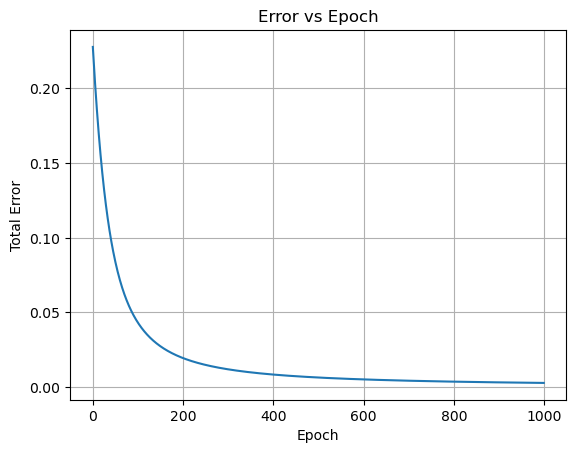

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Activation function (sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize weights and biases
def initialize_weights(n_inputs, n_hidden, n_output):
    input_weights = np.array([[0.6, -0.3], [-0.1, 0.4]])
    hidden_weights = np.array([[0.4], [0.1]])
    input_bias = np.array([[0.3, 0.5]])
    hidden_bias = np.array([[-0.2]])
    return input_weights, hidden_weights, input_bias, hidden_bias

# Forward propagation
def forward_propagation(x, input_weights, hidden_weights, input_bias, hidden_bias):
    hidden_input = np.dot(x, input_weights) + input_bias
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, hidden_weights) + hidden_bias
    output_output = sigmoid(output_input)
    return hidden_output, output_output

# Backward propagation
def backward_propagation(x, t, hidden_output, output_output, 
                          input_weights, hidden_weights, input_bias, hidden_bias,
                          learning_rate):
    output_error = t - output_output
    output_delta = output_error * sigmoid_derivative(output_output)
    hidden_error = output_delta.dot(hidden_weights.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

    hidden_weights += learning_rate * hidden_output.reshape(-1, 1) * output_delta
    input_weights += learning_rate * x.reshape(-1, 1) * hidden_delta
    hidden_bias += learning_rate * output_delta
    input_bias += learning_rate * hidden_delta

    return input_weights, hidden_weights, input_bias, hidden_bias

# Training the neural network
def train_neural_network(inputs, targets, input_weights, hidden_weights,
                          input_bias, hidden_bias, learning_rate, epochs):
    error_history = []

    for epoch in range(epochs):
        total_error = 0

        for i in range(len(inputs)):
            x = inputs[i]
            t = targets[i]

            hidden_output, output_output = forward_propagation(
                x, input_weights, hidden_weights, input_bias, hidden_bias
            )

            input_weights, hidden_weights, input_bias, hidden_bias = backward_propagation(
                x, t, hidden_output, output_output,
                input_weights, hidden_weights, input_bias, hidden_bias,
                learning_rate
            )

            output_error = t - output_output
            total_error += np.sum(output_error**2)

        error_history.append(total_error)

        if epoch % 100 == 0:
            print(f"Epoch: {epoch}")
            print("Hidden Layer Output:")
            print(hidden_output)
            print("Final Output:")
            print(output_output)
            print("Output Layer Error:")
            print(output_error)
            print("Updated Weights:")
            print("Input to Hidden Weights:")
            print(input_weights)
            print("Hidden to Output Weights:")
            print(hidden_weights)
            print("\n")

    return input_weights, hidden_weights, input_bias, hidden_bias, error_history

# Parameters
learning_rate = 0.1
epochs = 1000
input_data = np.array([[0, 1]])
target_data = np.array([[1]])

# Initialize weights and biases
input_weights, hidden_weights, input_bias, hidden_bias = initialize_weights(2, 2, 1)

# Train the neural network
trained_input_weights, trained_hidden_weights, trained_input_bias, trained_hidden_bias, errors = train_neural_network(
    input_data, target_data, input_weights, hidden_weights, input_bias, hidden_bias,
    learning_rate, epochs
)

# Plot the error
plt.plot(range(epochs), errors)
plt.xlabel('Epoch')
plt.ylabel('Total Error')
plt.title('Error vs Epoch')
plt.grid(True)
plt.show()
